선형모델
==
다루는 내용
--
- 머신러닝 개념
- 경사하강법
- 선형회귀, 회귀직선
- 선형분류, 분류경계
- 컨퓨전 매트릭스, 분류성능,ROC, AUC

## 실습 데이터 생성

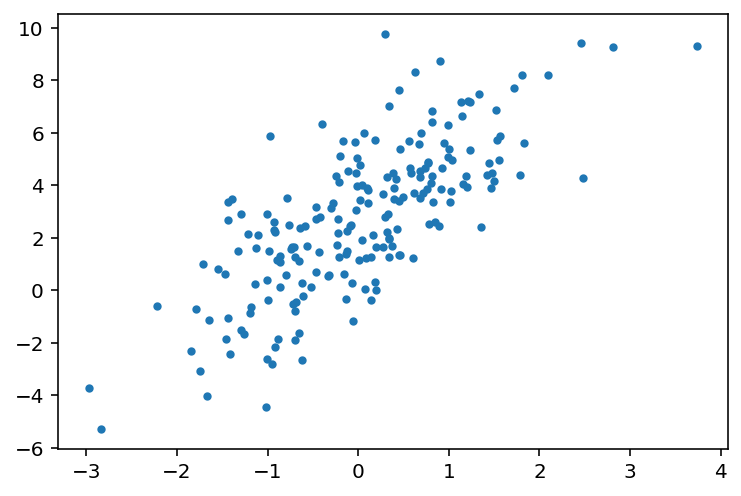

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

n_samples = 200
x = np.random.randn(n_samples)

# 계수 및 절편
w = 2
b = 3
# 노이지 
y = w*x + b + np.random.randn(n_samples)*2
plt.scatter(x,y, s=10)

## 선형회귀 모델 사용

In [0]:
from sklearn.linear_model import LinearRegression
leg = LinearRegression()
leg.xfit(.reshape(-1,1), y)

print(leg.coef_)
print(leg.intercept_)

[2.13193188]
3.050112440491601


## 회귀직선

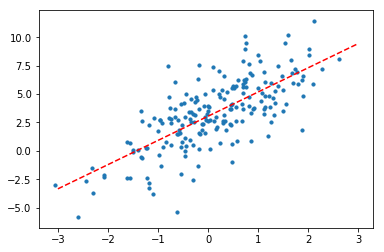

In [0]:
a, b = leg.coef_, leg.intercept_
xs = np.linspace(-3, 3, 10)
plt.plot(xs, a*xs + b, "r--")
plt.scatter(x,y, s=10)

## 남여 키-몸무게-성별 예측

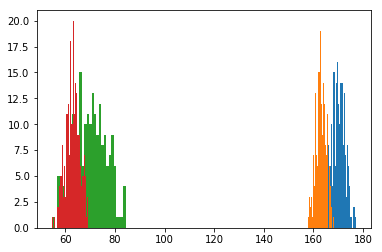

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split

n_samples = 200
x1 = 3*np.random.randn(n_samples) + 170
x2 = 2*np.random.randn(n_samples) + 163

y1 = 2*x1 - 270 + 3*np.random.randn(n_samples) # 평균 70kg
y2 = 1*x2 - 100 + 2*np.random.randn(n_samples) # 평균 60kg
plt.hist(x1, bins=30)
plt.hist(x2, bins=30)

plt.hist(y1, bins=30)
plt.hist(y2, bins=30)
plt.show()

In [0]:
# 남자 데이터만 사용하여 키로부터 몸무게 예측
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2)
leg1 = LinearRegression()
leg1.fit(X_train.reshape(-1,1), y_train)

# R-square 점수
leg1.score(X_test.reshape(-1,1), y_test)

0.8142128243333253

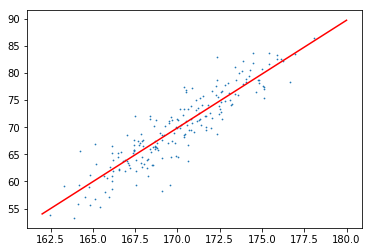

In [0]:
xs = np.linspace(162,180,3)
ys = xs * leg1.coef_[0] + leg1.intercept_
plt.scatter(x1, y1, s=0.5)
plt.plot(xs, ys, c='r')

## 남여 데이터를 합친 데이터 (400명)

In [0]:
x = np.concatenate((x1, x2))
y = np.concatenate((y1, y2))

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
leg1 = LinearRegression()
leg1.fit(X_train.reshape(-1,1), y_train)
leg1.score(X_test.reshape(-1,1), y_test)

0.7765619284009645

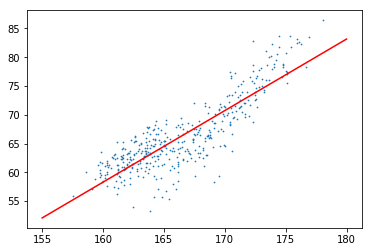

In [0]:
xs = np.linspace(155,180,3)
ys = xs * leg1.coef_[0] + leg1.intercept_
plt.scatter(x,y, s=0.5)
plt.plot(xs, ys, c='r')

In [0]:
# 남성을 0으로 여성을 1로 인코딩
X1 = pd.DataFrame({'height':x1, 'sex':0})
X2 = pd.DataFrame({'height':x2, 'sex':1})
X = pd.concat([X1, X2], ignore_index=True)
X[:10]

,height,sex
0,173.411445,0
1,163.308465,0
2,175.396723,0
3,166.502080,0
4,166.127771,0
5,168.802280,0
6,174.057215,0
7,170.381828,0
8,173.186300,0
9,169.068411,0


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
leg = LinearRegression()
leg.fit(X_train, y_train)

leg.score(X_test, y_test)

0.7565858724292533

## 성별을 고려하여 성능이 개선됨

In [0]:
print(leg.coef_)
print(leg.intercept_)

[1.76262569 5.59311238]
-229.76642423914498


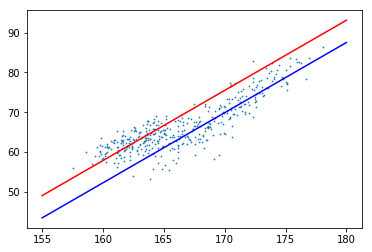

In [0]:
xs = np.linspace(155,180,3)
plt.scatter(x,y, s=0.5)
ys = xs * leg.coef_[0] + leg.coef_[1]*0 + leg.intercept_
plt.plot(xs, ys, c='b')
ys = xs * leg.coef_[0] + leg.coef_[1]*1 + leg.intercept_
plt.plot(xs, ys, c='r')

# 선형 분류

In [0]:
X["weight"] = y
X[:10]

,height,sex,weight
0,173.411445,0,76.054182
1,163.308465,0,59.157997
2,175.396723,0,83.694762
3,166.502080,0,65.306320
4,166.127771,0,66.491067
5,168.802280,0,66.198401
6,174.057215,0,78.898809
7,170.381828,0,73.420268
8,173.186300,0,74.002985
9,169.068411,0,64.370826


In [0]:

y = X["sex"] ;y[:5]

0    0
1    0
2    0
3    0
4    0
Name: sex, dtype: int64

In [0]:
X = X.drop(["sex"], axis=1, errors='ignore');X[:5]

,height,weight
0,173.411445,76.054182
1,163.308465,59.157997
2,175.396723,83.694762
3,166.502080,65.306320
4,166.127771,66.491067


In [0]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.2)
clf = SGDClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9375

In [0]:
y_pred = clf.predict(X_test)

In [0]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

- Precision  = 모델이 옳다고 한 것이 실제로 옳은 비율     TP / ( TP + FP ) 
- Recall =  실제 정답인 것들 중, 모델이 정답이라고 예측한 것    TP / TP+FN
- f1-score = Precision과 Recall의 조화평균  (2 x  Precision x Recall ) /  (Precision + Recall)
- support는 이 모델에서 응답한 샘플의 수이다

In [0]:
confusion_matrix(y_test, y_pred)

array([[36,  2],
       [ 3, 39]])

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94        38
           1       0.95      0.93      0.94        42

    accuracy                           0.94        80
   macro avg       0.94      0.94      0.94        80
weighted avg       0.94      0.94      0.94        80



In [0]:
a1, a2, b = clf.coef_[0][0], clf.coef_[0][1], clf.intercept_

In [0]:
m1, m2 = sc.mean_[0], sc.mean_[1]
s1, s2 = sc.scale_[0], sc.scale_[1]

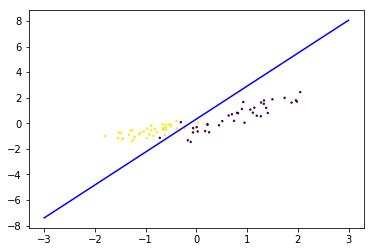

In [0]:
xs = np.linspace(-3,3,3)
plt.scatter(X_test[:,0],X_test[:,1], s=2, c=y_test)
ys = xs * (-a1/a2) - b/a2
plt.plot(xs, ys, c='b')

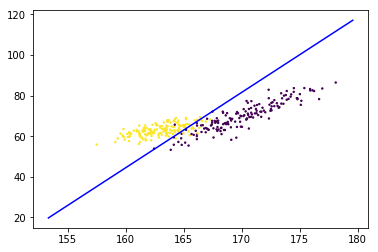

In [0]:
xs = np.linspace(-3,3,3)
plt.scatter(X_train[:,0]*s1+m1,X_train[:,1]*s2+m2, s=2, c=y_train)
ys = xs * (-a1/a2) - b/a2
plt.plot(xs*s1+m1, ys*s2+m2, c='b')

In [0]:
scores = clf.decision_function(X_test)

In [0]:
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(y_test, scores)
roc_auc = auc(fpr, tpr)

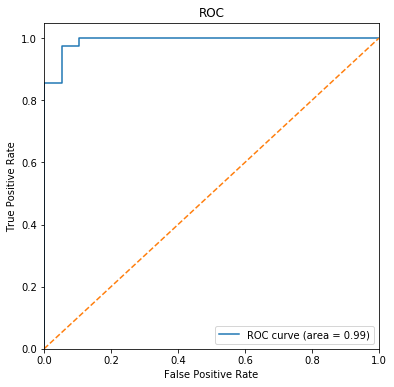

In [0]:
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")

## (참고) 랜덤 포레스트를 사용하는 경우

In [0]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=20)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.95

## (참고) ROC 성능 비교

In [0]:
# 평가 점수 score 임의로 20명을 배정, 랭킹 평가
y_score = np.linspace(99, 60, 20).round(1)
print(y_score)

[99.  96.9 94.9 92.8 90.8 88.7 86.7 84.6 82.6 80.5 78.5 76.4 74.4 72.3
 70.3 68.2 66.2 64.1 62.1 60. ]


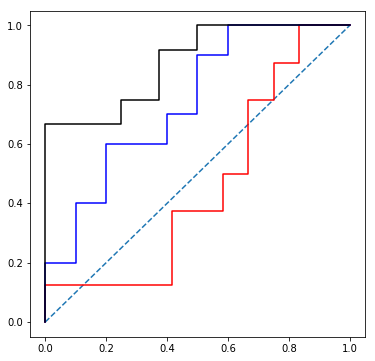

In [0]:
y_real=[[1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0],
        [1,1,0,1,1,0,1,1,0,0,1,0,1,1,0,1,0,0,0,0],
        [1,1,1,1,1,1,1,1,0,0,1,0,1,1,0,1,0,0,0,0]]

plt.figure(figsize=(6,6))    
fpr = dict()
tpr = dict()
plt.plot([0, 1], [0, 1], linestyle='--')

my_color = ['r', 'b', 'k']
for i in range(3):
    fpr, tpr, _ = roc_curve(y_real[i], y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, c=my_color[i])